## Amdahl's Law 

Improving a portion _p_ of a computation by factor _s_ results in an overall speedup of

<img src="./images/al1.png" width="256" title="Amdahl's Law Equation" />

* _p_ is the proportion of execution time that benefits from improved resources, i.e. the parallel part
* _(1-p)_ is the portion that does not benefit; i.e. the serial part
* _s_ is the speedup of the optimized part
* _S<sub>latency</sub>(s)_ theoretical speedup of the whole task

Paraphrased: speedup limited to fraction improved

<img src="./images/al2.png" width="512" title="Amdahl's Law Graph" />

### Visualizing Amdahl's Law

Let's look at the Amdahl curve for a given parallel fraction (.95).


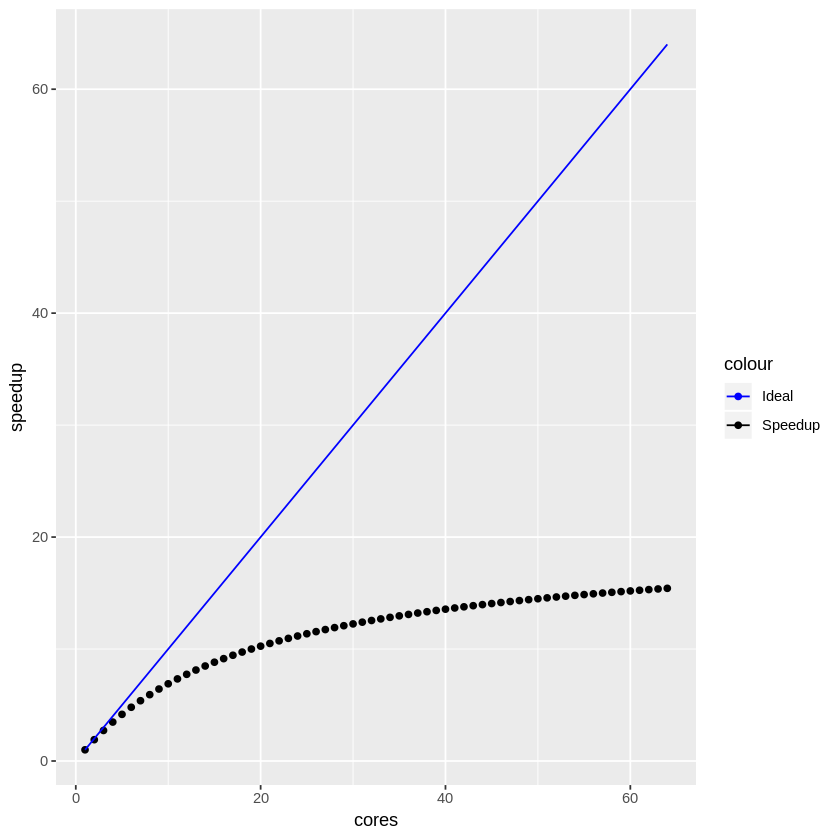

In [87]:
library(ggplot2)

# Let's assume we have a 4 socket x 16 core machine.  So up to 64 cores.
cores = seq(1:1:64)

p = .95
        
amdahl <- data.frame(cores, 1/((1-p)+p/cores))
colnames(amdahl) <- c("cores","speedup")

aplot <- ggplot(amdahl, aes(x=cores, y=speedup, color="Speedup")) + geom_point() +
            geom_line(data=amdahl, aes(x=cores,y=cores, color="Ideal")) +
            scale_color_manual(values = c("Speedup" = 'black','Ideal' = 'blue'))

print(aplot)



### Scaling

Let's now look at how performance scales as function of the parallel fraction.

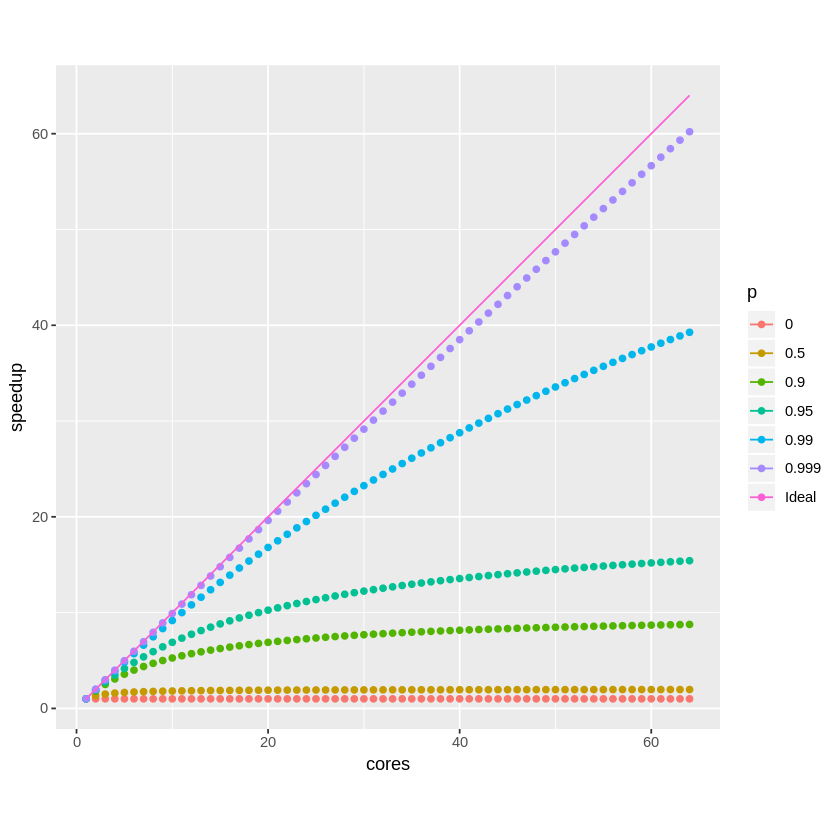

In [82]:
library(ggplot2)

# Let's assume we have a 4 socket x 16 core machine.  So up to 64 cores.
cores = seq(1:1:64)

# and a parallel fraction of 99%
p = factor(c(0,.5,.9,.95,.99,.999))

# build a data frame 
df <- data.frame(crossing(cores,p))
df$pnumeric <- as.numeric(levels(df$p))[df$p]

# with speedup
df$speedup <- 1/((1-df$pnumeric)+df$pnumeric/df$cores)

plt <- ggplot(df, aes(x=cores, y=speedup))+geom_point(aes(color=p)) +
            geom_line(data=df, aes(x=cores,y=cores, color="Ideal")) +
            coord_fixed()

print(plt)

OK, that's a little underwhelming.  Let's look at this the other way around.

* Supposing you want to achieve a speedup of 80 with 100 processors, what fraction of the original computation can be sequential?

In [92]:
# 80 = 1 / ((1-p)+p/100)
p = (100-100/80)/99
p

[1] 0.9974747

Amdahl's law indicates that even a small degree of unoptimized code limits performance.

### So what is sequential?

We say 'sequential' as a simple abstraction for the unopitmized portion.

An abstraction to reason about parallelism.
* Sometimes literal:
  * Outer/control thread in OpenMP
  * File system I/O before launching a program
* Sometimes metaphorical:
  * When one/few processes are running while others are idle 
  * When parallelism introduces additional computation

The unoptimized fraction of the code occurs
when not all resources are doing useful work at full capacity.

### Infering parallelism from Amdahl's Law

Simplifying unoptimized into sequential and parallel allows us to infer an __Amdahl Number__ from 
the exmpirical performance of a code.

* Supposing you want to achieve a speedup of 80 with 100 processors, what fraction of the original computation can be unoptimized?

$$latex 
p = \frac{n}{n-1}{1-\frac{1/S_{ls}})
$$

In [93]:
# 80 = 1 / ((1-p)+p/100)
p = (100-100/80)/99
p

[1] 0.9974747

The practice is to measure the _speedup_ of a code and use that speedup to infer the Amdah number.

In [101]:
# we measure perforamnce as a function of cores. 
processors = c(2,4,8,16,32)
speedup = c(1.85, 3.30, 5.34, 7.4, 9.4)
amdahl_number <- processors/(processors-1)*(1-1/speedup)
amdahl_number

[1] 0.9189189 0.9292929 0.9288390 0.9225225 0.9224434

So, we would say that this code seems to have an Amdahl # of about .92.  The can be converted into a maximum possible speedup.

* Amdahl's law implies that the unoptimized fraction of the code dictates exactly how much speedup can be obtained on __an infinite number of cores__.

RBTODO equation and then 

In [110]:
slim <- 1/(1-0.92)
slim

[1] 12.5

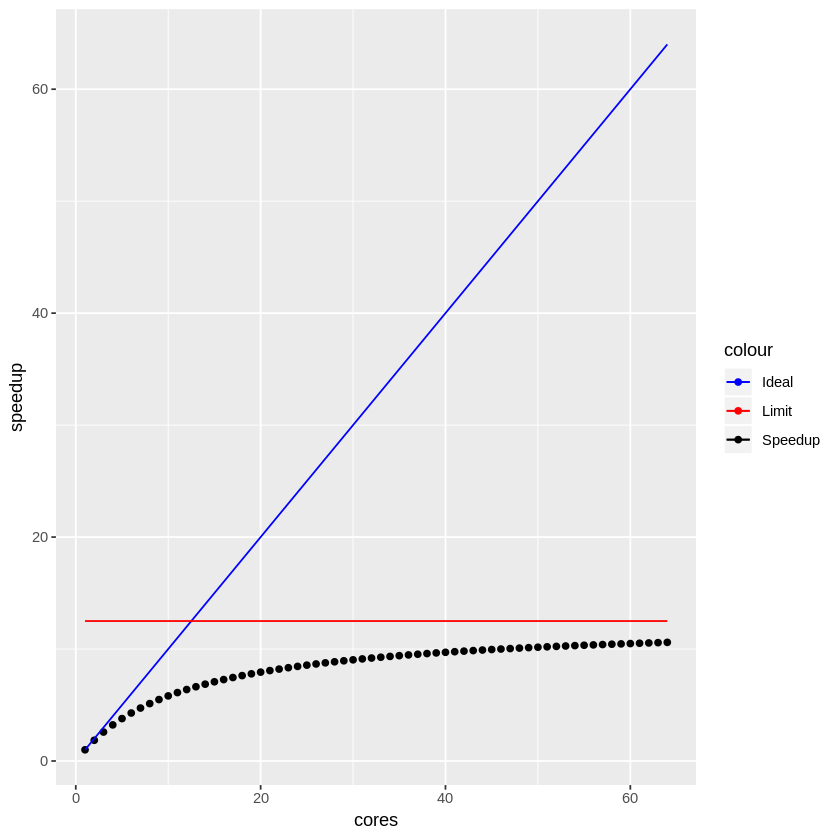

In [111]:
# Let's assume we have a 4 socket x 16 core machine.  So up to 64 cores.
cores = seq(1:1:12)

p = .92
        
amdahl <- data.frame(cores, 12.5, 1/((1-p)+p/cores))
colnames(amdahl) <- c("cores", "limit", "speedup")

aplot <- ggplot(amdahl, aes(x=cores, y=speedup, color="Speedup")) + geom_point() +
            geom_line(data=amdahl, aes(x=cores,y=cores, color="Ideal")) +
            geom_line(data=amdahl, aes(x=cores,y=limit, color="Limit")) +
            scale_color_manual(values = c("Speedup" = 'black','Ideal' = 'blue', 'Limit'='red'))
print(aplot)

